In [654]:
# These are the necessary libraries for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.special import boxcox1p

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [655]:
train = pd.read_csv("./house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("./house-prices-advanced-regression-techniques/test.csv")

In [656]:
print("Before dropping the Id, the train set : {} ".format(train.shape))
print("Before dropping the Id, the test set : {} ".format(test.shape))

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("\nThe train data size after dropping Id : {} ".format(train.shape)) 
print("The test data size after dropping Id : {} ".format(test.shape))

Before dropping the Id, the train set : (1460, 81) 
Before dropping the Id, the test set : (1459, 80) 

The train data size after dropping Id : (1460, 80) 
The test data size after dropping Id : (1459, 79) 


In [657]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [658]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [659]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The Skewness value is: 1.882876
The Kurtosis value is: 6.536282


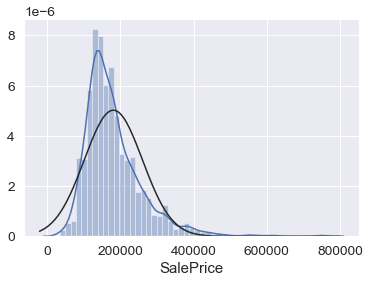

In [660]:
sns.distplot(train['SalePrice'], fit=norm)

print("The Skewness value is: %f" % train['SalePrice'].skew())
print("The Kurtosis value is: %f" % train['SalePrice'].kurt())

In [661]:
# Finding the categorical & numerical variables
categoricalVar = len(train.select_dtypes(include=['object']).columns)
numericalVar = len(train.select_dtypes(include=['int64','float64']).columns)

print('Total number of Features is: ', categoricalVar + numericalVar)
print('Number of Categorical variables : ', categoricalVar)
print('Number of Numerical variables : ', numericalVar)

Total number of Features is:  80
Number of Categorical variables :  43
Number of Numerical variables :  37


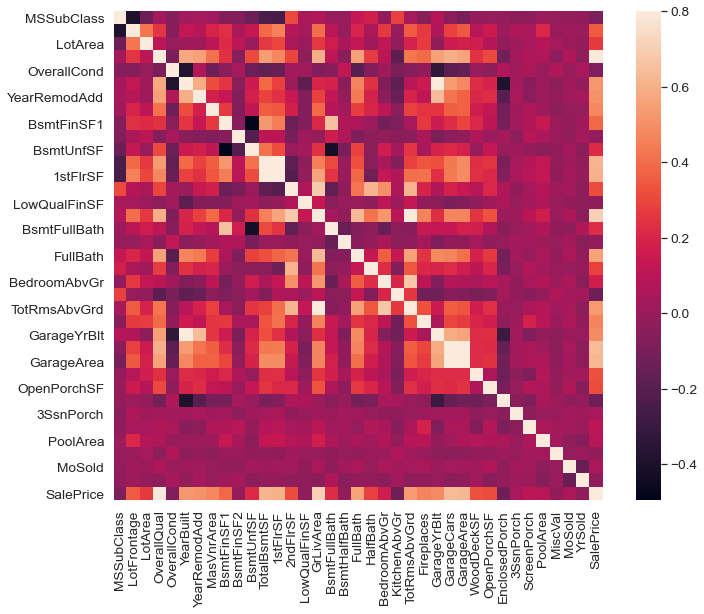

In [662]:
# Find all the features and their correlation with Sale Price
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

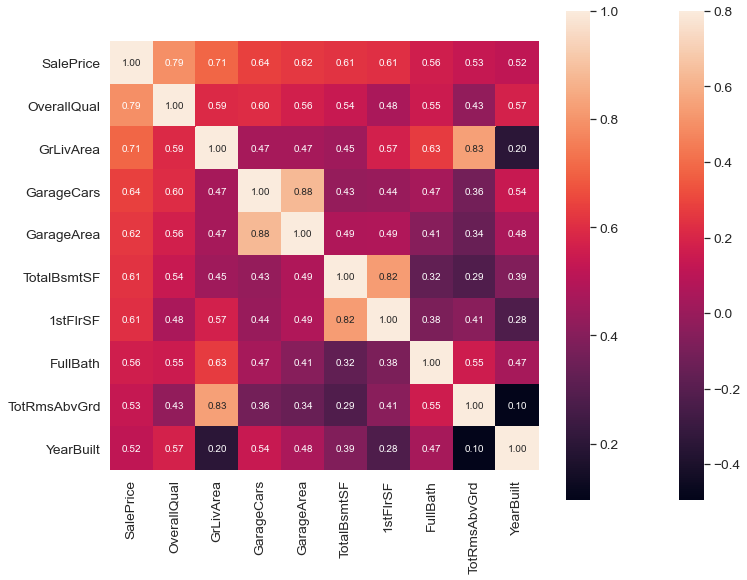

In [663]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Find the top 10 features that have a correlation with Sale Price
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Feature Analysis

### Living Room Area Correlation

In [664]:
train = train.drop(train[(train['GrLivArea']>3500) 
                         & (train['SalePrice']<800000)].index).reset_index(drop=True)

(0.0, 800000.0)

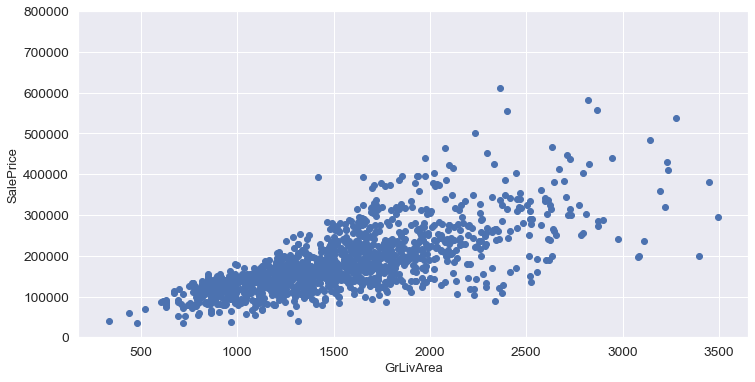

In [665]:
# GrLivArea analysis
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

### Overall Quality Correlation

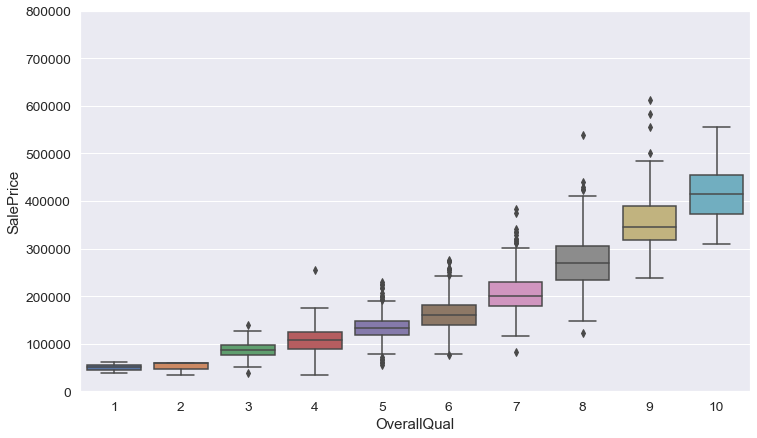

In [666]:
# OverallQual analysis
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(12, 7))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

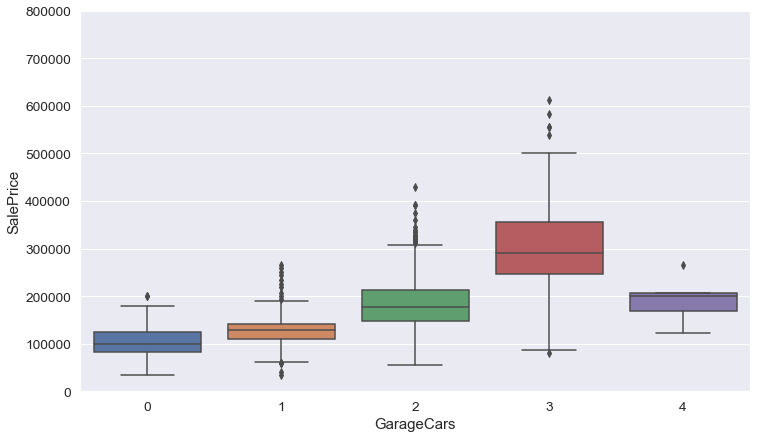

In [667]:
# GarageCars analysis
data = pd.concat([train['SalePrice'], train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(12, 7))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### Garage Area Correlation

In [668]:
train = train.drop(train[(train['GarageArea']>1000) & (train['SalePrice']<600000)].index).reset_index(drop=True)

(0.0, 800000.0)

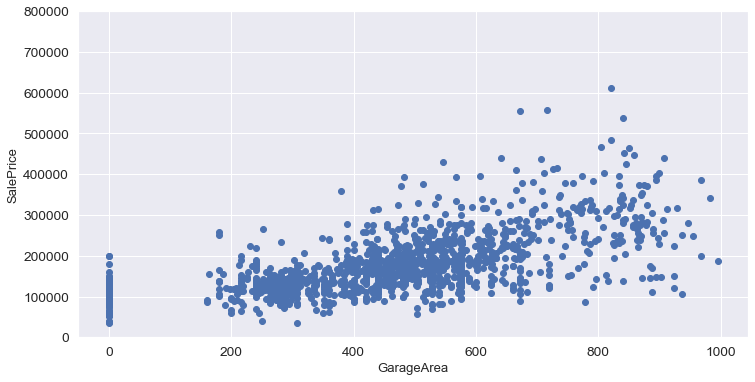

In [669]:
# GarageArea analysis
plt.figure(figsize=(12,6))
plt.scatter(x=train.GarageArea, y=train.SalePrice)
plt.xlabel("GarageArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

### Area of First Floor Correlation

In [670]:
train = train.drop(train[(train['1stFlrSF']>2600) & (train['SalePrice']<500000)].index).reset_index(drop=True)

(0.0, 800000.0)

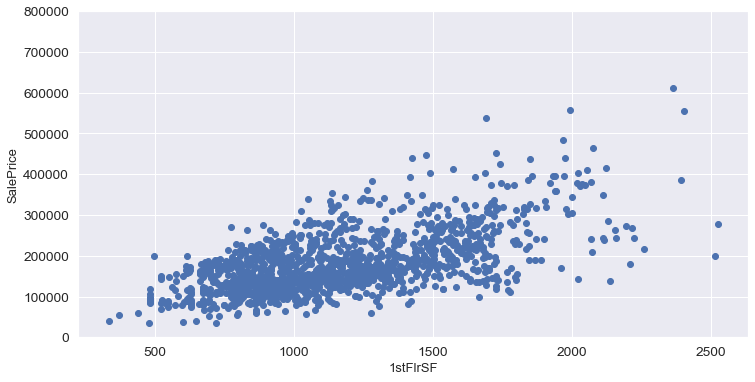

In [671]:
# 1stFlrSF analysis
plt.figure(figsize=(12,6))
plt.scatter(x=train['1stFlrSF'], y=train.SalePrice)
plt.xlabel("1stFlrSF", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

### Total Rooms (Above Grade) Correlation

In [672]:
train = train.drop(train[(train['TotRmsAbvGrd']>11) & (train['SalePrice']<300000)].index).reset_index(drop=True)

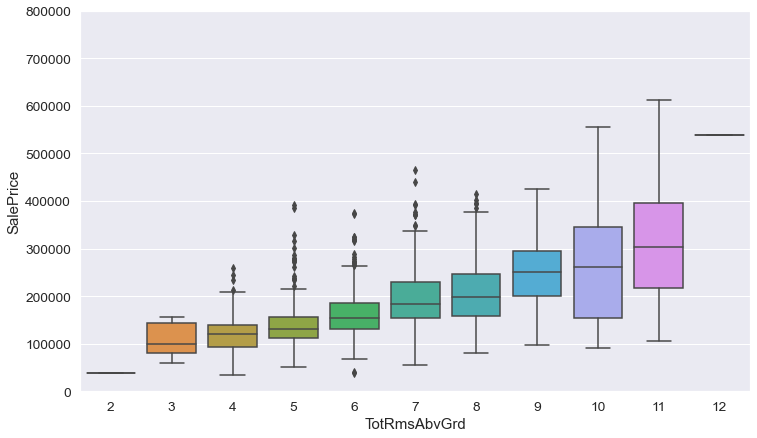

In [673]:
# TotRmsAbvGrd analysis
data = pd.concat([train['SalePrice'], train['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(12, 7))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### Year Built Correlation

(0.0, 800000.0)

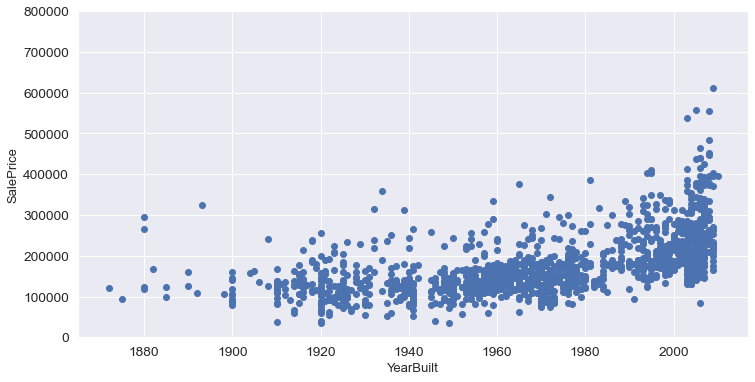

In [674]:
# YearBuilt analysis
plt.figure(figsize=(12,6))
plt.scatter(x=train['YearBuilt'], y=train.SalePrice)
plt.xlabel("YearBuilt", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

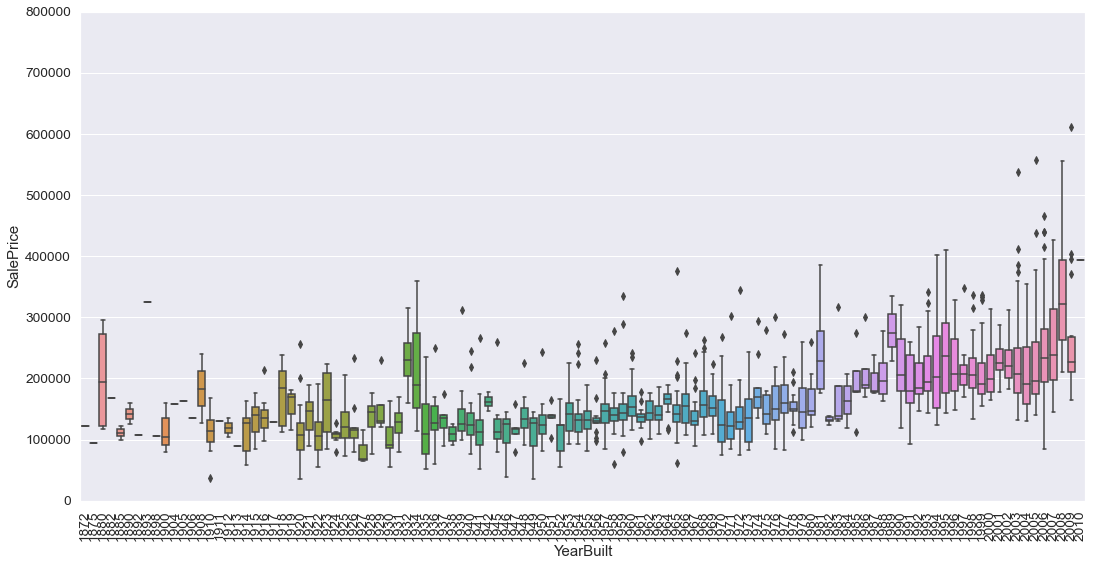

In [675]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(18, 9))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### Total Basement Square Feet Correlation

In [676]:
train = train.drop(train[(train['TotalBsmtSF']>2500) & (train['SalePrice']<600000)].index).reset_index(drop=True)

(0.0, 800000.0)

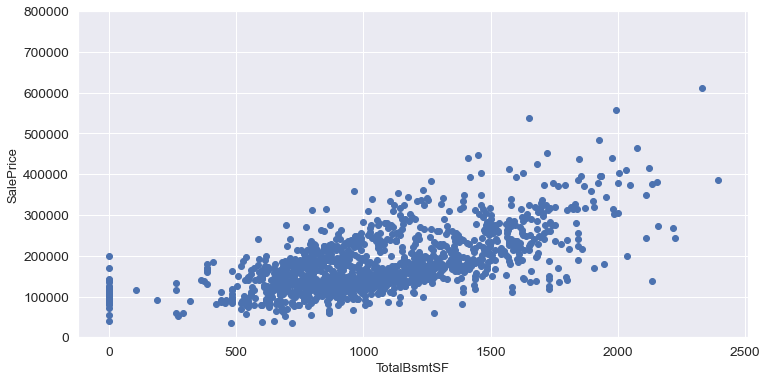

In [677]:
# TotalBsmtSF analysis
plt.figure(figsize=(12,6))
plt.scatter(x=train.TotalBsmtSF, y=train.SalePrice)
plt.xlabel("TotalBsmtSF", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

# Clean up the Data

### Remove Null Data

Text(0.5, 1.0, 'Number of missing values by feature')

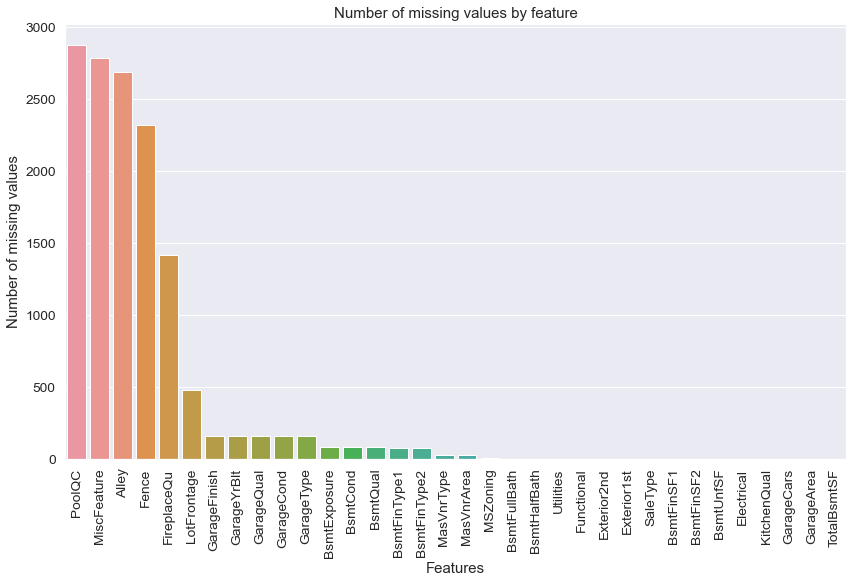

In [678]:
size_of_train = train.shape[0]
size_of_test = test.shape[0]
sale_price_train = train.SalePrice.values

total_data = pd.concat([train, test]).reset_index(drop=True)
total_data.drop(['SalePrice'], axis=1, inplace=True)

allmissingdata = (total_data.isnull().sum())
allmissingdata = allmissingdata.drop(allmissingdata[allmissingdata == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Numbers': allmissingdata})
missing_data

f, ax = plt.subplots(figsize=(14, 8))
plt.xticks(rotation='90')
sns.barplot(x=allmissingdata.index, y=allmissingdata)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Number of missing values', fontsize=15)
plt.title('Number of missing values by feature', fontsize=15)

In [679]:
total_data["PoolQC"] = total_data["PoolQC"].fillna("No Pool")
total_data["MiscFeature"] = total_data["MiscFeature"].fillna("No Misc Feature")
total_data["Alley"] = total_data["Alley"].fillna("No Alley Access")
total_data["Fence"] = total_data["Fence"].fillna("No Fence")
total_data["FireplaceQu"] = total_data["FireplaceQu"].fillna("No Fireplace")

neighborhoodGrp = total_data.groupby('Neighborhood')
medianVal = neighborhoodGrp['LotFrontage'].median()
total_data['LotFrontage'] = total_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

total_data["GarageFinish"] = total_data["GarageFinish"].fillna("No Garage")
total_data["GarageQual"] = total_data["GarageQual"].fillna("No Garage")
total_data["GarageCond"] = total_data["GarageCond"].fillna("No Garage")
total_data["GarageType"] = total_data["GarageType"].fillna("No Garage")

total_data["GarageYrBlt"] = total_data["GarageYrBlt"].fillna(0)
total_data["GarageArea"] = total_data["GarageArea"].fillna(0)
total_data["GarageCars"] = total_data["GarageCars"].fillna(0)

total_data["BsmtFinSF1"] = total_data["BsmtFinSF1"].fillna(0)
total_data["BsmtFinSF2"] = total_data["BsmtFinSF2"].fillna(0)
total_data["BsmtUnfSF"] = total_data["BsmtUnfSF"].fillna(0)
total_data["TotalBsmtSF"] = total_data["TotalBsmtSF"].fillna(0)
total_data["BsmtFullBath"] = total_data["BsmtFullBath"].fillna(0)
total_data["BsmtHalfBath"] = total_data["BsmtHalfBath"].fillna(0)

total_data["BsmtQual"] = total_data["BsmtQual"].fillna("No Basement")
total_data["BsmtCond"] = total_data["BsmtCond"].fillna("No Basement")
total_data["BsmtExposure"] = total_data["BsmtExposure"].fillna("No Basement")
total_data["BsmtFinType1"] = total_data["BsmtFinType1"].fillna("No Basement")
total_data["BsmtFinType2"] = total_data["BsmtFinType2"].fillna("No Basement")

total_data["MasVnrType"] = total_data["MasVnrType"].fillna("No Masonry Veneer")
total_data["MasVnrArea"] = total_data["MasVnrArea"].fillna("0")

total_data["MSZoning"] = total_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

total_data["Functional"] = total_data["Functional"].fillna("Typ")
total_data = total_data.drop(['Utilities'], axis=1)
total_data['SaleType'] = total_data['SaleType'].fillna(total_data['SaleType'].mode()[0])

total_data['KitchenQual'] = total_data['KitchenQual'].fillna(total_data['KitchenQual'].mode()[0])
total_data['Electrical'] = total_data['Electrical'].fillna(total_data['Electrical'].mode()[0])

total_data['Exterior2nd'] = total_data['Exterior2nd'].fillna(total_data['Exterior2nd'].mode()[0])
total_data['Exterior1st'] = total_data['Exterior1st'].fillna(total_data['Exterior1st'].mode()[0])

### Feature Engineering

In [680]:
total_data['MSSubClass'] = total_data['MSSubClass'].apply(str)
total_data['OverallCond'] = total_data['OverallCond'].astype(str)
total_data['YrSold'] = total_data['YrSold'].astype(str)
total_data['MoSold'] = total_data['MoSold'].astype(str)

In [681]:
total_data['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [682]:
from sklearn.preprocessing import LabelEncoder
cols = ('ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(total_data[c].values)) 
    total_data[c] = lbl.transform(list(total_data[c].values))

In [683]:
total_data['TotalSF'] = total_data['TotalBsmtSF'] + total_data['1stFlrSF'] + total_data['2ndFlrSF']

### Normalize Skewed Data

##### Applying log(x + 1) to all the columns using the numpy function log1p

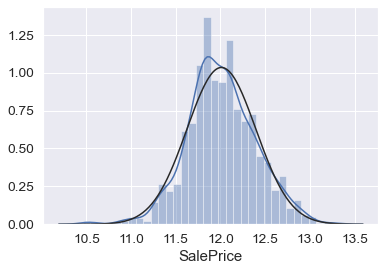

In [685]:
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);

In [686]:
train = total_data[:size_of_train]
test = total_data[size_of_train:]

### Creating the Prediction Model